# Smoothing Methods: Centered and Trailing Moving Averages.

### Import required packages.

In [1]:
from pathlib import Path

import numpy as np 
import pandas as pd 
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import acf
from dmba import regressionSummary
import warnings

import matplotlib.pylab as plt
%matplotlib inline

no display found. Using non-interactive Agg backend


### Create templates for graph layout.

In [23]:
# Create a template for graph layout with partitions for data set. 
def Graph_Layout_Partition_Data():
    # Determine coordinates for drawing vertical lines and 
    # horizontal arrows on the chart.    
    one_month = pd.Timedelta('31 days')
    xtrain = (min(train_ts.index), max(train_ts.index) - one_month)
    xvalid = (min(valid_ts.index) + one_month, max(valid_ts.index) - one_month)
    xfuture = (max(valid_ts.index) + one_month, '2022')
    xtv = xtrain[1] + 0.7 * (xvalid[0] - xtrain[1])
    xvf = xvalid[1] + 1.0 * (xfuture[0] - xvalid[1])

    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2013-12', 3300), xytext=('1991', 3300), 
              arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2018-12', 3300), xytext=('2014-2', 3300), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 3300), xytext=('2019-2', 3300), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2001', 3330, 'Training')
    ax.text('2015-1', 3330, 'Validation')
    ax.text('2019-7', 3330, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(1300, 3500)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')


# Create a template for graph layout with partitions for residuals. 
def Graph_Layout_Partition_Residuals():
    # Determine coordinates for drawing vertical lines and 
    # horizontal arrows on the chart.    
    one_month = pd.Timedelta('31 days')
    xtrain = (min(train_ts.index), max(train_ts.index) - one_month)
    xvalid = (min(valid_ts.index) + one_month, max(valid_ts.index) - one_month)
    xfuture = (max(valid_ts.index) + one_month, '2022')
    xtv = xtrain[1] + 0.7 * (xvalid[0] - xtrain[1])
    xvf = xvalid[1] + 1.0 * (xfuture[0] - xvalid[1])

    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2013-12', 600), xytext=('1991', 600), 
              arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2018-12', 600), xytext=('2014-2', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 600), xytext=('2019-2', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2001', 620, 'Training')
    ax.text('2015-1', 620, 'Validation')
    ax.text('2019-7', 620, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(-600, 700)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')

    
# Create a template for graph layout with entire dataset and 12 periods 
# in future. 
def Graph_Layout_Entire_Data():
    # Determine coordinates for drawing vertical lines and horizontal 
    # arrows on the chart.
    one_month = pd.Timedelta('31 days')
    xridership = (min(ridership_ts.index), max(ridership_ts.index) - one_month)
    xfuture = (max(ridership_ts.index) + one_month, '2022')
    xvf = xridership[1] + 0.7 * (xfuture[0] - xridership[1])

    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2018-12', 3300), xytext=('1991', 3300), 
              arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 3300), xytext=('2019-2', 3300), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2005', 3330, 'Training')
    ax.text('2019-7', 3330, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(1300, 3500)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')
    

# Create a template for graph layout with entire data for residuals. 
def Graph_Layout_Entire_Data_Residuals():
    # Determine coordinates for drawing vertical lines and 
    # horizontal arrows on the chart.    
    one_month = pd.Timedelta('31 days')
    xridership = (min(ridership_ts.index), max(ridership_ts.index) - one_month)
    xfuture = (max(ridership_ts.index) + one_month, '2022')
    xvf = xridership[1] + 0.7 * (xfuture[0] - xridership[1])

    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2018-12', 600), xytext=('1991', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 600), xytext=('2019-2', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2005', 620, 'Training')
    ax.text('2019-7', 620, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(-600, 700)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')

### Create measures of forecast accuracy. 

In [3]:
# Create forcast accuracy measures.
def Forecast_Accuracy(actual, forecast):
    
    # ME - mean error.
    me = round(np.mean(actual - forecast),3) 
    
    # RMSE - root mean square error (RMSE).
    rmse = round((np.mean((actual - forecast)**2)**.5),3)  
   
    # MAE - mean absolute error.
    mae = round(np.mean(np.abs(actual - forecast)),3)   
   
    # MPE - mean percentage error,%.
    mpe = round(((np.mean((actual - forecast)/actual))*100),3) 
    
    # MAPE - mean absolute percentage error, %.
    mape = round(((np.mean(np.abs((actual - forecast)/actual)))*100),3) 
    
    # Ignore unnecessary future warnings on ACF1. 
    warnings.filterwarnings('ignore')
    
    # ACF1 - autocorrelation of errors at lag 1.
    acf1 = round((acf(actual - forecast)[1]),3)                  
    
    return({'ME':me, 'RMSE':rmse, 'MAE':mae, 
            'MPE':mpe, 'MAPE':mape, 'ACF1':acf1})

### Create time series data set.

In [4]:
# Create Amtrak data frame.
Amtrak_data = pd.read_csv('Amtrak_comp.csv')

# Display the first 5 records of Amtrak data set.

# Convert the date information to a datetime object as monthly data.
Amtrak_data['Date'] = pd.to_datetime(Amtrak_data.Month)

# Convert data set to time series  data set. Name is used 
# to label the data.
ridership_ts = pd.Series(Amtrak_data.Ridership.values, 
                index=Amtrak_data.Date, name='Ridership')

# Define Amtrak time series frequency as month 'MS'. 
ridership_ts.index = pd.DatetimeIndex(ridership_ts.index, freq = 'MS')

# Display first 5 records of Amtrak time series data.
ridership_ts.head()

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
Freq: MS, Name: Ridership, dtype: float64

### Create centered MA for various windows (number of periods). Generate plot for original data and centered MA. 

In [5]:
# Create centered moving average with window k = 4, 5, and 12.
# Notice: for window with even number, rolling() function 
# is not correct, requires more calculations, see it 
# for k = 4 and k = 12.  
ma_centered_4 = ridership_ts.rolling(4, center=True).mean().rolling(2).mean().shift(-1)
ma_centered_5 = ridership_ts.rolling(5, center=True).mean()
ma_centered_12 = ridership_ts.rolling(12, center=True).mean().rolling(2).mean().shift(-1)
print('Centered MA, k = 4')
print(ma_centered_4)

print(' ')
print('Centered MA, k = 5')
print(ma_centered_5)

print(' ')
print('Centered MA, k = 12')
print(ma_centered_12[0:12])


Centered MA, k = 4
Date
1991-01-01            NaN
1991-02-01            NaN
1991-03-01    1811.726625
1991-04-01    1875.203750
1991-05-01    1901.318125
                 ...     
2018-08-01    2772.248875
2018-09-01    2768.923000
2018-10-01    2740.506750
2018-11-01            NaN
2018-12-01            NaN
Freq: MS, Name: Ridership, Length: 336, dtype: float64
 
Centered MA, k = 5
Date
1991-01-01          NaN
1991-02-01          NaN
1991-03-01    1817.7694
1991-04-01    1848.4572
1991-05-01    1912.3120
                ...    
2018-08-01    2777.2554
2018-09-01    2794.5764
2018-10-01    2744.1038
2018-11-01          NaN
2018-12-01          NaN
Freq: MS, Name: Ridership, Length: 336, dtype: float64
 
Centered MA, k = 12
Date
1991-01-01            NaN
1991-02-01            NaN
1991-03-01            NaN
1991-04-01            NaN
1991-05-01            NaN
1991-06-01            NaN
1991-07-01    1805.616083
1991-08-01    1799.049917
1991-09-01    1793.008667
1991-10-01    1795.626333
199

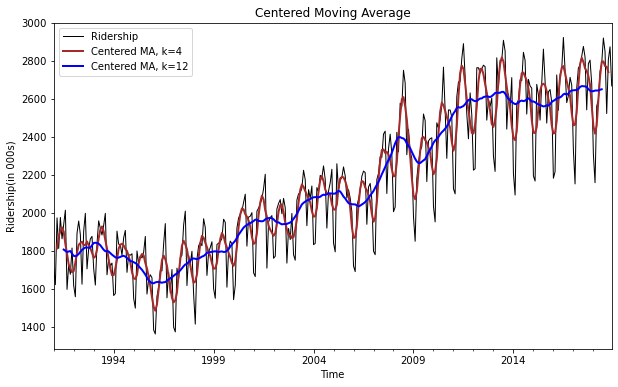

In [6]:
# Plot original data and centered MA for window widths of 
# k= 4 and 12. 
fig, ax = plt.subplots(figsize=(10, 6))
ax = ridership_ts.plot(ax=ax, color='black', linewidth=1)
ma_centered_4.plot(ax=ax, color='brown', linewidth=2)
ma_centered_12.plot(ax=ax, color='blue', linewidth=2)
ax.set_xlabel('Time')
ax.set_ylabel('Ridership(in 000s)')
ax.legend(['Ridership', 'Centered MA, k=4', 'Centered MA, k=12'])
plt.title('Centered Moving Average')
plt.show()

### Create data partition. 

In [7]:
# Define the numbers of months in the training and validation sets,
# nTrain and nValid, respectively.
nValid = 60
nTrain = len(ridership_ts) - nValid

# Partition the training data set and display it. 
train_ts = ridership_ts[:nTrain]
print()
print('Training Data Set')
print(train_ts)

# Partition the validation data set and show (print) it. 
valid_ts = ridership_ts[nTrain:]
print()
print('Validation Data Set')
print(valid_ts.head())
print(valid_ts.tail())


Training Data Set
Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2013-08-01    2851.979
2013-09-01    2440.153
2013-10-01    2625.820
2013-11-01    2550.704
2013-12-01    2711.851
Freq: MS, Name: Ridership, Length: 276, dtype: float64

Validation Data Set
Date
2014-01-01    2206.788
2014-02-01    2092.819
2014-03-01    2575.951
2014-04-01    2592.994
2014-05-01    2700.179
Freq: MS, Name: Ridership, dtype: float64
Date
2018-08-01    2848.935
2018-09-01    2522.367
2018-10-01    2807.200
2018-11-01    2873.968
2018-12-01    2668.049
Freq: MS, Name: Ridership, dtype: float64


### Create trailing MA  using training data for various windows and display these MAs. Forecast using trailing MAs and identify forecast accuracy in validation period.

In [8]:
# Create trailing moving average with window 
# (number of periods) k = 4, 5, and 12.
ma_trailing_4 = round(train_ts.rolling(4).mean(), 3)
ma_trailing_5 = round(train_ts.rolling(5).mean(), 3)
ma_trailing_12 = round(train_ts.rolling(12).mean(), 3)

print('Trailing MA, k = 4')
print(ma_trailing_4)

print(' ')
print('Trailing MA, k = 5')
print(ma_trailing_5)

print(' ')
print('Trailing MA, k = 12')
print(ma_trailing_12)


Trailing MA, k = 4
Date
1991-01-01         NaN
1991-02-01         NaN
1991-03-01         NaN
1991-04-01    1778.471
1991-05-01    1844.982
                ...   
2013-08-01    2842.103
2013-09-01    2751.260
2013-10-01    2706.536
2013-11-01    2617.164
2013-12-01    2582.132
Freq: MS, Name: Ridership, Length: 276, dtype: float64
 
Trailing MA, k = 5
Date
1991-01-01         NaN
1991-02-01         NaN
1991-03-01         NaN
1991-04-01         NaN
1991-05-01    1817.769
                ...   
2013-08-01    2805.531
2013-09-01    2761.713
2013-10-01    2726.172
2013-11-01    2675.369
2013-12-01    2636.101
Freq: MS, Name: Ridership, Length: 276, dtype: float64
 
Trailing MA, k = 12
Date
1991-01-01         NaN
1991-02-01         NaN
1991-03-01         NaN
1991-04-01         NaN
1991-05-01         NaN
                ...   
2013-08-01    2633.924
2013-09-01    2629.983
2013-10-01    2632.445
2013-11-01    2631.703
2013-12-01    2640.643
Freq: MS, Name: Ridership, Length: 276, dtype: float64

In [13]:
# Create forecast for the validation data for the window 
# widths of k = 4, 5, and 12 in validation period. 
ma_trail_4_pred = round(pd.Series(ma_trailing_4[-1], 
                      index = valid_ts.index), 3)
ma_trail_5_pred = round(pd.Series(ma_trailing_5[-1], 
                      index = valid_ts.index), 3)
ma_trail_12_pred = round(pd.Series(ma_trailing_12[-1], 
                      index = valid_ts.index), 3)

# Display trailing MA forecast with k = 4 and k = 12 in validation period.
print('Trailing MA Forecast, k = 4, in Validation Period')
print(ma_trail_4_pred.head())
print(ma_trail_4_pred.tail())

print("")
print('Trailing MA Forecast, k = 12, in Validation Period')
print(ma_trail_12_pred.head())
print(ma_trail_12_pred.tail())

Trailing MA Forecast, k = 4, in Validation Period
Date
2014-01-01    2582.132
2014-02-01    2582.132
2014-03-01    2582.132
2014-04-01    2582.132
2014-05-01    2582.132
Freq: MS, dtype: float64
Date
2018-08-01    2582.132
2018-09-01    2582.132
2018-10-01    2582.132
2018-11-01    2582.132
2018-12-01    2582.132
Freq: MS, dtype: float64

Trailing MA Forecast, k = 12, in Validation Period
Date
2014-01-01    2640.643
2014-02-01    2640.643
2014-03-01    2640.643
2014-04-01    2640.643
2014-05-01    2640.643
Freq: MS, dtype: float64
Date
2018-08-01    2640.643
2018-09-01    2640.643
2018-10-01    2640.643
2018-11-01    2640.643
2018-12-01    2640.643
Freq: MS, dtype: float64


In [14]:
# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy 
# measures for trailing MA with k = 4 in validation
# period. 
print('Accuracy Measures for Trailing MA, k = 4')
print(Forecast_Accuracy(valid_ts, ma_trail_4_pred))

# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy 
# measures for trailing MA with k = 5 in validation
# period. 
print(' ')
print('Accuracy Measures for Trailing MA, k = 5')
print(Forecast_Accuracy(valid_ts, ma_trail_5_pred))

# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy 
# measures for trailing MA with k = 12 in validation
# period. 
print(' ')
print('Accuracy Measures for Trailing MA, k = 12')
print(Forecast_Accuracy(valid_ts, ma_trail_12_pred))

Accuracy Measures for Trailing MA, k = 4
{'ME': 34.404, 'RMSE': 217.778, 'MAE': 176.279, 'MPE': 0.578, 'MAPE': 6.981, 'ACF1': 0.456}
 
Accuracy Measures for Trailing MA, k = 5
{'ME': -19.565, 'RMSE': 215.931, 'MAE': 162.237, 'MPE': -1.5, 'MAPE': 6.582, 'ACF1': 0.456}
 
Accuracy Measures for Trailing MA, k = 12
{'ME': -24.107, 'RMSE': 216.39, 'MAE': 161.46, 'MPE': -1.674, 'MAPE': 6.564, 'ACF1': 0.456}


### Generate plot for partition data and trailing MA.

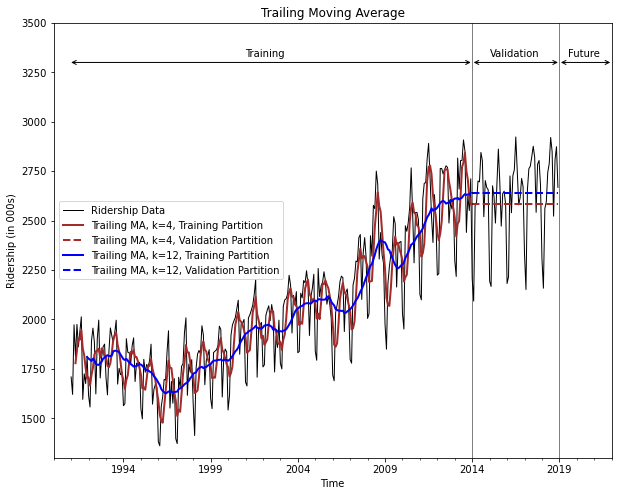

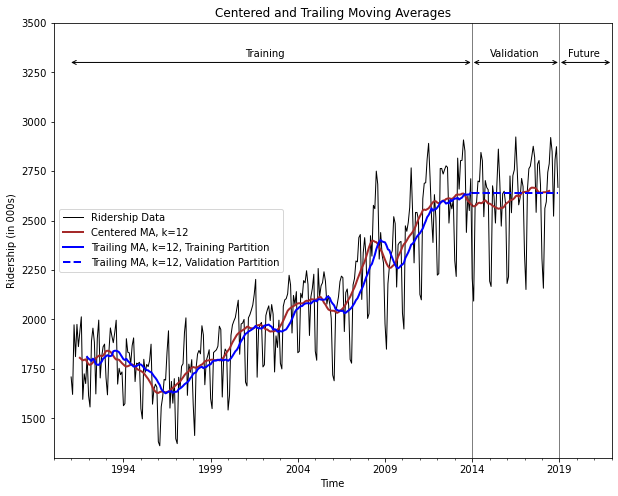

In [20]:
# Plot original data and forecast for training and validation
# partitions using trailing MA with window widths of k=4 and k=12.
fig, ax = plt.subplots(figsize=(10, 8))
ax = ridership_ts.plot(ax=ax, color='black', linewidth=1)
ma_trailing_4.plot(ax=ax, color='brown', linewidth=2)
ma_trail_4_pred.plot(ax=ax, style="--", color='brown', linewidth=2)
ma_trailing_12.plot(ax=ax, color='blue', linewidth=2)
ma_trail_12_pred.plot(ax=ax, style="--", color='blue', linewidth=2)
plt.legend(['Ridership Data', 
           'Trailing MA, k=4, Training Partition', 
           'Trailing MA, k=4, Validation Partition',
           'Trailing MA, k=12, Training Partition', 
           'Trailing MA, k=12, Validation Partition'],
           loc = 'center left' )
plt.title('Trailing Moving Average')

# Use template of graph layout for partitions for the above plot. 
Graph_Layout_Partition_Data()

# Plot original data, centered and trailing MA.
fig, ax = plt.subplots(figsize=(10, 8))
ax = ridership_ts.plot(ax=ax, color='black', linewidth=1)
ma_centered_12.plot(ax=ax, color='brown', linewidth=2)
ma_trailing_12.plot(ax=ax, color='blue', linewidth=2)
ma_trail_12_pred.plot(ax=ax, style="--", color='blue', linewidth=2)
plt.legend(['Ridership Data', 'Centered MA, k=12',
           'Trailing MA, k=12, Training Partition', 
           'Trailing MA, k=12, Validation Partition'],
            loc = 'center left')          
plt.title('Centered and Trailing Moving Averages')

# Use template of graph layout for partitions for the above plot. 
Graph_Layout_Partition_Data()

# Display both plots.
plt.show()